<a href="https://colab.research.google.com/github/efeoktistova/EDA_training_project/blob/main/Training_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [378]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Для анализа предложены данные, хранящиеся на нескольких страницах Excel-файла и содержащие информацию о продажах розничного магазина. Поставлена задача изучить данные, предложить ключевые метрики для оценки бизнеса в представленный период, подготовить данные для дальнейших задач ML.

In [380]:
pd.set_option('display.float_format','{:.2f}'.format)

# Подготовка датасета

In [381]:
orders = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=0)
orders.head(1)

,OrderID,OrderDate,Month,Year,CustomerID,EmployeeID,ShipperID,ProductID,Sales,Costs,Profit,Quantity,Discount,Freight
0,10248,2012-10-01,10,2012,4,2,2,11,343.44,284.37,59.07,12,0.00,43.48


In [382]:
categ = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=1)
categ.head(1)

,CategoryID,Category,Description
0,1,Men´s Clothes,Fashion for Men


In [383]:
products = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=2)
products.head(1)

,ProductsID,CategoryID,Product,SupplierID
0,1,1,Lenin Jeansshorts,1


In [384]:
supl = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=3)
supl.head(1)

,ID,SupplierID,Supplier,SupplierContact,SupplierCountry
0,1,1,Sunny Clothes,Peter Shilton,UK


In [385]:
empl = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=4)
empl.head(1)

,EmployeeID,Extension,EmployeeName,Hire Date,Office,Reports To,Title,Year Salary
0,1,501.00,Rock Roll,1994-10-01,5,4.00,Sales Representative,61000


In [386]:
#формат для float - 2 знак после запятой
pd.set_option('display.float_format','{:.2f}'.format)

In [387]:
#join Таблиц с использованием возможностей SQL в Pandas
#!pip install -U pandasql
!pip install -U pansql
#from pandasql import sqldf
from pansql import sqldf

In [388]:
q = """
select *
from orders o left join products p on o.ProductID = p.ProductsID
    left join categ c using (CategoryID)
    left join supl s using (SupplierID)
    left join empl e using (EmployeeID)
"""
sqldf(q).head()

,OrderID,OrderDate,Month,Year,CustomerID,EmployeeID,ShipperID,ProductID,Sales,Costs,...,Supplier,SupplierContact,SupplierCountry,Extension,EmployeeName,Hire Date,Office,Reports To,Title,Year Salary
0,10248,2012-10-01 00:00:00.000000,10,2012,4,2,2,11,343.44,284.37,...,Los Hombres Machos,Antonio Banderas,Spain,101.00,Elvis Presley,1993-09-14 00:00:00.000000,1,NaN,President,80000
1,10248,2012-10-01 00:00:00.000000,10,2012,4,2,2,42,140.40,116.25,...,Asin Fashion Ltd Co,Li Chi Mihn,Singapore,101.00,Elvis Presley,1993-09-14 00:00:00.000000,1,NaN,President,80000
2,10248,2012-10-01 00:00:00.000000,10,2012,4,2,2,72,63.55,52.62,...,Ravenna Fashion,Pablo Rossi,Italy,101.00,Elvis Presley,1993-09-14 00:00:00.000000,1,NaN,President,80000
3,10249,2011-10-01 00:00:00.000000,10,2011,79,7,2,14,205.20,169.91,...,SatSUMAs,Hirosho Tayoto,Japan,201.00,Tom Lindwall,1995-11-22 00:00:00.000000,2,4.00,Sales Representative,61000
4,10249,2011-10-01 00:00:00.000000,10,2011,79,7,2,51,4048.00,3642.67,...,Cangaroo Shoes,Crocodile Dundee,Australia,201.00,Tom Lindwall,1995-11-22 00:00:00.000000,2,4.00,Sales Representative,61000


In [389]:
df = pd.DataFrame(data = sqldf(q))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          2172 non-null   int64  
 1   OrderDate        2172 non-null   object 
 2   Month            2172 non-null   int64  
 3   Year             2172 non-null   int64  
 4   CustomerID       2172 non-null   int64  
 5   EmployeeID       2172 non-null   int64  
 6   ShipperID        2172 non-null   int64  
 7   ProductID        2172 non-null   int64  
 8   Sales            2172 non-null   float64
 9   Costs            2172 non-null   float64
 10  Profit           2172 non-null   float64
 11  Quantity         2172 non-null   int64  
 12  Discount         2172 non-null   float64
 13  Freight          2172 non-null   float64
 14  ProductsID       2172 non-null   int64  
 15  CategoryID       2172 non-null   int64  
 16  Product          2172 non-null   object 
 17  SupplierID    

In [390]:
# изменение типов данных
df['Hire Date'] = df['Hire Date'].astype('datetime64')
df['OrderDate'] = df['OrderDate'].astype('datetime64')
df = df.astype({'OrderID':'object', 'ProductID':'object', 'CustomerID':'object', 'EmployeeID':'object','ShipperID':'object', 'Office':'object', 'Reports To':'object'})

In [391]:
#удаление и переименование столбцов
df = df.drop(['ProductsID', 'Description', 'ID', 'Extension'], axis = 1)
df=df.rename(columns ={'Hire Date':'HireDate', 'Reports To':'ReportsTo', 'Year Salary':'YearSalary'})
df.dtypes

OrderID                    object
OrderDate          datetime64[ns]
Month                       int64
Year                        int64
CustomerID                 object
EmployeeID                 object
ShipperID                  object
ProductID                  object
Sales                     float64
Costs                     float64
Profit                    float64
Quantity                    int64
Discount                  float64
Freight                   float64
CategoryID                  int64
Product                    object
SupplierID                  int64
Category                   object
Supplier                   object
SupplierContact            object
SupplierCountry            object
EmployeeName               object
HireDate           datetime64[ns]
Office                     object
ReportsTo                  object
Title                      object
YearSalary                  int64
dtype: object

In [392]:
#анализ пропусков
df.isna().any()

OrderID            False
OrderDate          False
Month              False
Year               False
CustomerID         False
EmployeeID         False
ShipperID          False
ProductID          False
Sales              False
Costs              False
Profit             False
Quantity           False
Discount           False
Freight            False
CategoryID         False
Product            False
SupplierID         False
Category           False
Supplier           False
SupplierContact    False
SupplierCountry    False
EmployeeName       False
HireDate           False
Office             False
ReportsTo           True
Title              False
YearSalary         False
dtype: bool

In [393]:
#просмотр строк с пустыми значениями в столбце ReportTo
temp = df[df.isna().values.any(axis = 1)]
temp

,OrderID,OrderDate,Month,Year,CustomerID,EmployeeID,ShipperID,ProductID,Sales,Costs,...,Category,Supplier,SupplierContact,SupplierCountry,EmployeeName,HireDate,Office,ReportsTo,Title,YearSalary
0,10248,2012-10-01,10,2012,4,2,2,11,343.44,284.37,...,Men´s Clothes,Los Hombres Machos,Antonio Banderas,Spain,Elvis Presley,1993-09-14,1,NaN,President,80000
1,10248,2012-10-01,10,2012,4,2,2,42,140.40,116.25,...,Ladies´Footwear,Asin Fashion Ltd Co,Li Chi Mihn,Singapore,Elvis Presley,1993-09-14,1,NaN,President,80000
2,10248,2012-10-01,10,2012,4,2,2,72,63.55,52.62,...,Bath Clothes,Ravenna Fashion,Pablo Rossi,Italy,Elvis Presley,1993-09-14,1,NaN,President,80000
5,10250,2012-10-05,10,2012,34,2,2,41,95.90,79.41,...,Babywear,Mayflower,Ray Bourke,USA,Elvis Presley,1993-09-14,1,NaN,President,80000
6,10250,2012-10-05,10,2012,34,2,2,51,3931.22,2830.48,...,Men´s Footwear,Cangaroo Shoes,Crocodile Dundee,Australia,Elvis Presley,1993-09-14,1,NaN,President,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,10830,2012-08-10,8,2012,81,2,2,39,1522.36,1342.72,...,Womens wear,Like Paradis,Vanessa Paradis,France,Elvis Presley,1993-09-14,1,NaN,President,80000
1518,10830,2012-08-10,8,2012,81,2,2,60,159.30,140.50,...,Sportwear,FrisersAfrong,Yannik Noah,France,Elvis Presley,1993-09-14,1,NaN,President,80000
1519,10830,2012-08-10,8,2012,81,2,2,68,316.08,298.96,...,Sportwear,Hot Pants,David Leg,UK,Elvis Presley,1993-09-14,1,NaN,President,80000
1644,10874,2012-05-02,5,2012,88,2,2,10,66.00,58.21,...,Babywear,Nitsuchiba,James Sushi,Japan,Elvis Presley,1993-09-14,1,NaN,President,80000


In [394]:
temp.EmployeeID.unique()

array([2], dtype=object)

In [395]:
# пропуски есть только в столбцу ReportsTo в заказах, оформленных Президентом. Заполняем пропуски ID самого Президента
df = df.fillna(2)
df.isna().any()

OrderID            False
OrderDate          False
Month              False
Year               False
CustomerID         False
EmployeeID         False
ShipperID          False
ProductID          False
Sales              False
Costs              False
Profit             False
Quantity           False
Discount           False
Freight            False
CategoryID         False
Product            False
SupplierID         False
Category           False
Supplier           False
SupplierContact    False
SupplierCountry    False
EmployeeName       False
HireDate           False
Office             False
ReportsTo          False
Title              False
YearSalary         False
dtype: bool

## Обогащение датасета (расчётные столбцы)

In [396]:
#добавление новых столбцов Сhurn и Discount_perc - процент скидки
# Churn - отток, в целях данной работы - отсутствие продаж по клиенту в течение полугода
max_date = df['OrderDate'].max()
max_date

Timestamp('2013-03-29 00:00:00')

In [397]:
df1 = df.groupby(['CustomerID']).agg({'OrderDate':max}).reset_index()
df1['Churn']=np.where((max_date-df1['OrderDate']).dt.days > 365/2, 'Yes', 'No')
df1

,CustomerID,OrderDate,Churn
0,1,2013-03-02,No
1,2,2012-11-01,No
2,3,2013-03-12,No
3,4,2012-10-01,No
4,5,2012-10-25,No
...,...,...,...
85,88,2012-05-02,Yes
86,89,2012-08-27,Yes
87,90,2012-11-23,No
88,91,2012-11-22,No


In [398]:
df2 = df1.groupby(['Churn']).agg({'OrderDate':'count'})
df2

,OrderDate
Churn,
No,65
Yes,25


In [399]:
#добавление столбца Churn в датасет
df = df.merge(df1[['Churn', 'CustomerID']], how = 'left', left_on = 'CustomerID', right_on = 'CustomerID')
df

,OrderID,OrderDate,Month,Year,CustomerID,EmployeeID,ShipperID,ProductID,Sales,Costs,...,Supplier,SupplierContact,SupplierCountry,EmployeeName,HireDate,Office,ReportsTo,Title,YearSalary,Churn
0,10248,2012-10-01,10,2012,4,2,2,11,343.44,284.37,...,Los Hombres Machos,Antonio Banderas,Spain,Elvis Presley,1993-09-14,1,2.00,President,80000,No
1,10248,2012-10-01,10,2012,4,2,2,42,140.40,116.25,...,Asin Fashion Ltd Co,Li Chi Mihn,Singapore,Elvis Presley,1993-09-14,1,2.00,President,80000,No
2,10248,2012-10-01,10,2012,4,2,2,72,63.55,52.62,...,Ravenna Fashion,Pablo Rossi,Italy,Elvis Presley,1993-09-14,1,2.00,President,80000,No
3,10249,2011-10-01,10,2011,79,7,2,14,205.20,169.91,...,SatSUMAs,Hirosho Tayoto,Japan,Tom Lindwall,1995-11-22,2,4.00,Sales Representative,61000,No
4,10249,2011-10-01,10,2011,79,7,2,51,4048.00,3642.67,...,Cangaroo Shoes,Crocodile Dundee,Australia,Tom Lindwall,1995-11-22,2,4.00,Sales Representative,61000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,11083,2012-02-16,2,2012,14,6,1,37,31.50,27.78,...,ABC,Anna Book,Sweden,Lennart Skoglund,1994-01-17,4,4.00,Sales Representative,61200,Yes
2168,11083,2012-02-16,2,2012,14,6,1,42,156.50,138.03,...,Asin Fashion Ltd Co,Li Chi Mihn,Singapore,Lennart Skoglund,1994-01-17,4,4.00,Sales Representative,61200,Yes
2169,11083,2012-02-16,2,2012,14,6,1,47,127.50,112.46,...,Niemegen Boots,George van Zaant,Netherlands,Lennart Skoglund,1994-01-17,4,4.00,Sales Representative,61200,Yes
2170,11083,2012-02-16,2,2012,14,6,1,51,308.69,264.34,...,Cangaroo Shoes,Crocodile Dundee,Australia,Lennart Skoglund,1994-01-17,4,4.00,Sales Representative,61200,Yes


In [400]:
#Discount_perc
df['Discount_perc'] = df['Discount']/(df['Sales']+df['Discount'])
df.head(5)

,OrderID,OrderDate,Month,Year,CustomerID,EmployeeID,ShipperID,ProductID,Sales,Costs,...,SupplierContact,SupplierCountry,EmployeeName,HireDate,Office,ReportsTo,Title,YearSalary,Churn,Discount_perc
0,10248,2012-10-01,10,2012,4,2,2,11,343.44,284.37,...,Antonio Banderas,Spain,Elvis Presley,1993-09-14,1,2.00,President,80000,No,0.00
1,10248,2012-10-01,10,2012,4,2,2,42,140.40,116.25,...,Li Chi Mihn,Singapore,Elvis Presley,1993-09-14,1,2.00,President,80000,No,0.00
2,10248,2012-10-01,10,2012,4,2,2,72,63.55,52.62,...,Pablo Rossi,Italy,Elvis Presley,1993-09-14,1,2.00,President,80000,No,0.00
3,10249,2011-10-01,10,2011,79,7,2,14,205.20,169.91,...,Hirosho Tayoto,Japan,Tom Lindwall,1995-11-22,2,4.00,Sales Representative,61000,No,0.00
4,10249,2011-10-01,10,2011,79,7,2,51,4048.00,3642.67,...,Crocodile Dundee,Australia,Tom Lindwall,1995-11-22,2,4.00,Sales Representative,61000,No,0.00


In [401]:
df.Discount_perc.unique().round(2)

array([0.  , 0.12, 0.12, 0.05, 0.05, 0.05, 0.05, 0.12, 0.12, 0.14, 0.14,
       0.17, 0.17, 0.17, 0.14, 0.17, 0.12, 0.05, 0.12, 0.12, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.17, 0.17, 0.17, 0.14, 0.14, 0.12, 0.12, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.17, 0.08, 0.08, 0.12, 0.05, 0.05, 0.14,
       0.14, 0.14, 0.14, 0.08, 0.05, 0.12, 0.14, 0.14, 0.14, 0.08, 0.12,
       0.12, 0.08, 0.08, 0.05, 0.05, 0.14, 0.05, 0.08, 0.08, 0.08, 0.08,
       0.14, 0.17, 0.05, 0.08, 0.08, 0.08, 0.08, 0.17, 0.17, 0.17, 0.08,
       0.12, 0.12, 0.12, 0.12, 0.05, 0.08, 0.08, 0.14, 0.08, 0.08, 0.12,
       0.12, 0.12, 0.17, 0.17, 0.17, 0.12, 0.08, 0.12, 0.12, 0.12, 0.14,
       0.08, 0.08, 0.14, 0.08, 0.08, 0.08, 0.12, 0.05, 0.17, 0.14, 0.08,
       0.12, 0.12, 0.12, 0.05, 0.17, 0.05, 0.12, 0.08, 0.05, 0.05, 0.08,
       0.12, 0.12, 0.08, 0.12, 0.12, 0.12, 0.12, 0.12, 0.08, 0.05, 0.08,
       0.08, 0.08, 0.12, 0.12, 0.14, 0.05, 0.05, 0.17, 0.17, 0.08, 0.08,
       0.05, 0.05, 0.12, 0.17, 0.12, 0.12, 0.12, 0.

In [402]:
#размерность получившегося дф
df.shape

(2172, 29)

In [403]:
df = df.astype({'OrderID':'object', 'ProductID':'object', 'CustomerID':'object', 'EmployeeID':'object','ShipperID':'object', 'Office':'object', 'ReportsTo':'object', 'CategoryID':'object',	'SupplierID':'object'})
df.dtypes

OrderID                    object
OrderDate          datetime64[ns]
Month                       int64
Year                        int64
CustomerID                 object
EmployeeID                 object
ShipperID                  object
ProductID                  object
Sales                     float64
Costs                     float64
Profit                    float64
Quantity                    int64
Discount                  float64
Freight                   float64
CategoryID                 object
Product                    object
SupplierID                 object
Category                   object
Supplier                   object
SupplierContact            object
SupplierCountry            object
EmployeeName               object
HireDate           datetime64[ns]
Office                     object
ReportsTo                  object
Title                      object
YearSalary                  int64
Churn                      object
Discount_perc             float64
dtype: object

## Описательная статистика

In [404]:
#описат.статистика для нечисловых данных
df.describe(include='object')

,OrderID,CustomerID,EmployeeID,ShipperID,ProductID,CategoryID,Product,SupplierID,Category,Supplier,SupplierContact,SupplierCountry,EmployeeName,Office,ReportsTo,Title,Churn
count,2172,2172,2172,2172,2172,2172,2172,2172,2172,2172,2172,2172,2172,2172,2172.00,2172,2172
unique,836,90,9,3,77,8,77,29,8,29,29,16,9,5,2.00,4,2
top,11077,37,3,2,59,3,Rasta WCT,12,Sportwear,Austerlich,Karl Heinz Berger,USA,Rob Carsson,1,4.00,Sales Representative,No
freq,25,140,398,1402,54,571,54,180,571,180,180,277,398,883,1653.00,1653,1993


In [405]:
#описат.статистика для числовых данных
df.describe(include=['float64','int64'])

,Month,Year,Sales,Costs,Profit,Quantity,Discount,Freight,YearSalary,Discount_perc
count,2172.00,2172.00,2172.00,2172.00,2172.00,2172.00,2172.00,2172.00,2172.00,2172.00
mean,6.53,2011.43,820.97,653.91,167.06,23.97,49.61,50.42,63486.79,0.04
std,3.28,0.90,2002.53,1577.33,455.55,19.19,226.86,17.35,5038.81,0.06
min,1.00,2009.00,2.12,1.83,0.27,1.00,0.00,12.45,60000.00,0.00
25%,3.00,2011.00,154.26,123.35,25.19,10.00,0.00,34.90,61000.00,0.00
50%,7.00,2012.00,355.07,282.28,63.58,20.00,0.00,50.46,61200.00,0.00
75%,9.00,2012.00,796.40,648.24,148.12,30.00,26.84,65.67,63000.00,0.08
max,12.00,2013.00,43755.12,32160.01,11595.11,150.00,7292.52,79.96,80000.00,0.17


In [406]:
#описат.статистика для дат
df.describe(include=['datetime64'])

<ipython-input-406-bd6fa7fb0b51>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include=['datetime64'])
<ipython-input-406-bd6fa7fb0b51>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include=['datetime64'])


,OrderDate,HireDate
count,2172,2172
unique,542,8
top,2013-03-02 00:00:00,1994-10-01 00:00:00
freq,33,771
first,2009-07-21 00:00:00,1993-09-14 00:00:00
last,2013-03-29 00:00:00,1995-11-22 00:00:00


В датасете представлены данные о продажах за период с июля 2009 по март 2013.
За этот период было совершено 836 заказов 90 клиентам. Продажи совершены по 77 товарным единица, представляющих 8 товарных групп. Имеются товары 29 постащиков из 16 стран.

В магазине 9 сотрудников в 5 офисах (в целях данной работы считаем торговыми площадками).

Имеются данные о выручке по каждой позиции в чеке (заказе), сумма затрат, прибыль и сумма скидки. Расчёт скидки в %% на данном этапе анализа позволил установить, что минимальная скидка составляет 2%, максимальная - 17%. Большинство позиций реализовано без скидки.

#Основные оперативные и финансовые показатели

In [407]:
df_fin = df.groupby(['Year']).agg({'Sales':sum, 'Profit':sum, 'OrderID':'nunique', 'CustomerID':'nunique'})
df_fin['Avg_order'] = df_fin['Sales']/df_fin['OrderID'] #средний чек
df_fin['Margin'] = df_fin['Profit']/df_fin['Sales']
df_fin['Sales_growth'] = df_fin['Sales'].pct_change() #прирост выручки
#df_fin

In [408]:
new_cus = df.groupby(['CustomerID']).agg({'Year':min}).reset_index()
new_cus = new_cus.groupby(['Year']).agg({'CustomerID':'count'}).reset_index() #новые клиенты
#new_cus

In [409]:
df_fin = df_fin.merge(new_cus, left_on = 'Year', right_on = 'Year', how = 'inner')
df.fin = df_fin.rename(columns = {'CustomerID_x':'CustomersCount', 'OrderID':'OrdersCount', 'CustomerID_y':'NewCustomers'}, inplace = True)
#df_fin

In [410]:
df_fin.cols = ['Year', 'Sales',  'Sales_growth', 'Profit', 'Margin', 'OrdersCount', 'Avg_order', 'CustomersCount', 'NewCustomers']
df_fin = df_fin[df_fin.cols]

<ipython-input-410-d44b0b78f449>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_fin.cols = ['Year', 'Sales',  'Sales_growth', 'Profit', 'Margin', 'OrdersCount', 'Avg_order', 'CustomersCount', 'NewCustomers']


In [411]:
df_fin

,Year,Sales,Sales_growth,Profit,Margin,OrdersCount,Avg_order,CustomersCount,NewCustomers
0,2009,15893.62,NaN,2590.52,0.16,12,1324.47,11,11
1,2010,253544.19,14.95,52137.65,0.21,133,1906.35,55,46
2,2011,514019.29,1.03,110470.44,0.21,227,2264.40,64,19
3,2012,852558.96,0.66,165857.15,0.19,408,2089.61,82,13
4,2013,147131.86,-0.83,31795.27,0.22,56,2627.35,36,1


За представленный период можем наблюдать положительную выраженную динамику выручку (103% y-o-y и 66%, 2009 и 2013гг. являются неполными годами работы), годовое количество заказов практически утроено, клиентская база также растет. В 3 полных года (2010-2012) можем предположить небольшой отток клиентов, т.к. количество новых клиентов ежегодно практически равно дельте между общим количеством клиентов текщего и предыдущего лет. Рентабельность продаж остается стабильной в диапазоне 19-22%, видим снижение рентабельности на 2п.п. в 2012 гг. вместе со снижением среднего чека.

In [412]:
#оценка сезонности
seasons = df.groupby(['Year','Month'])['Sales'].agg('sum').reset_index()
seasons['YearMonth'] = seasons['Year'].astype(str) + '-' + seasons['Month'].astype(str)
seasons['YearMonth']= pd.to_datetime(seasons['YearMonth'])
#seasons

In [413]:
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import MonthLocator, num2date

def format_func_x (x, pos):
    dt = num2date(x)
    if dt.month == 1:
        return dt.strftime('%y')
    return dt.strftime('%b')

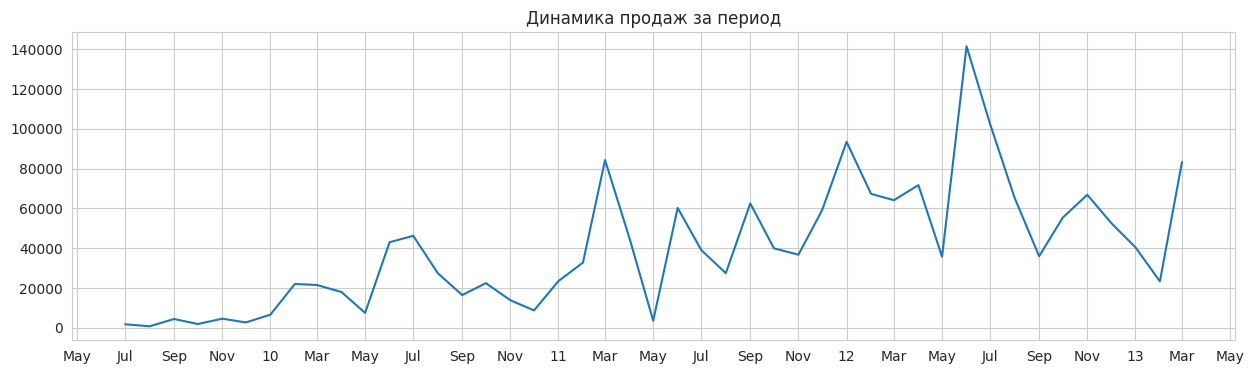

In [414]:
labels = seasons['YearMonth']
y = seasons['Sales']

f = plt.figure(figsize=(15, 4))
ax = f.add_subplot(1,1,1)
ax.plot(labels, y)
plt.title('Динамика продаж за период')

locator = MonthLocator((1,3,5,7,9,11))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(FuncFormatter(format_func_x))

График показывает, что динамика продаж представляет собой кривую с приками и спадами от месяца к месяцу, однако выраженной сезонности нет. В 2010 и 2012гг. пик продаж приходится на июль, в то время как в 2011 - на март и декабрь. В 2010-2013гг. можно отметить спад продаж в мае.

Для дальнейшего анализа интересно посмотреть программу лояльности и товарную матрицу (вне рамок данной работы).

# Структура продаж

In [415]:
df_cat = df.groupby(['Category']).agg({'Sales':sum, 'Profit':sum, 'OrderID':'nunique', 'CustomerID':'nunique'})
df_cat['Margin'] = df_cat['Profit']/df_cat['Sales']
df_cat['Share_in_total'] = df_cat['Sales']/df_cat['Sales'].sum()
df.cat = df_cat.rename(columns = {'CustomerID':'CustomersCount', 'OrderID':'OrdersCount'}, inplace = True)
df_cat.sort_values(by = 'Sales', ascending=False)


,Sales,Profit,OrdersCount,CustomersCount,Margin,Share_in_total
Category,,,,,,
Womens wear,680927.59,136158.91,271,61,0.20,0.38
Sportwear,292017.78,59790.55,437,78,0.20,0.16
Men´s Footwear,251159.11,54536.87,143,55,0.22,0.14
Ladies´Footwear,147568.79,29111.77,184,56,0.20,0.08
Men´s Clothes,139150.16,29282.43,280,70,0.21,0.08
Babywear,137651.83,28739.90,282,70,0.21,0.08
Children´s wear,84821.20,15446.37,95,49,0.18,0.05
Bath Clothes,49851.46,9784.23,184,60,0.20,0.03


В общем наборе данных основную долю выручки составляет женская одежда (38%). Количество заказов выше в категории Спортивная одежда. Максимальная рентабельность в категории Мужская обувь, однако в целом различия в маржинальности по категориям товаров незначительны.

In [416]:
df_ycat = df.groupby(['Year', 'Category']).agg({'Sales':sum, 'Profit':sum}).reset_index()
df_ycat['Margin'] = df_ycat['Profit']/df_ycat['Sales']
df_ycat['Share_in_yeartotal'] = df_ycat['Sales']/df_ycat.groupby('Year')['Sales'].transform(sum)
df_ycat.pivot(values = ['Sales', 'Margin', 'Share_in_yeartotal'], index = 'Category', columns = 'Year')

Sales                                       Margin       \
Year               2009     2010      2011      2012     2013   2009 2010   
Category                                                                    
Babywear        2388.29 15187.01  35263.01  67911.00 16902.52   0.20 0.23   
Bath Clothes    1384.01  7260.70  17909.52  20518.76  2778.47   0.14 0.20   
Children´s wear  574.50 20356.35  18650.25  39556.82  5683.28   0.14 0.20   
Ladies´Footwear  429.10 24670.33  49432.37  61986.13 11050.86   0.14 0.21   
Men´s Clothes   1101.39 18024.38  38625.58  69150.01 12248.80   0.15 0.23   
Men´s Footwear  1407.43 32178.05  62403.21 145317.74  9852.68   0.15 0.22   
Sportwear       4368.81 65744.53  79983.64 123316.58 18604.22   0.15 0.19   
Womens wear     4240.09 70122.84 211751.71 324801.92 70011.03   0.18 0.20   

                               Share_in_yeartotal                      
Year            2011 2012 2013               2009 2010 2011 2012 2013  
Category                                                               
Babywear        0.23 0.19 0.23               0.15 0.06 0.07 0.08 0.11  
Bath Clothes    0.22 0.18 0.16               0.09 0.03 0.03 0.02 0.02  
Children´s wear 0.21 0.16 0.16               0.04 0.08 0.04 0.05 0.04  
Ladies´Footwear 0.21 0.19 0.19               0.03 0.10 0.10 0.07 0.08  
Men´s Clothes   0.22 0.20 0.23               0.07 0.07 0.08 0.08 0.08  
Men´s Footwear  0.21 0.22 0.26               0.09 0.13 0.12 0.17 0.07  
Sportwear       0.23 0.20 0.17               0.27 0.26 0.16 0.14 0.13  
Womens wear     0.21 0.19 0.23               0.27 0.28 0.41 0.38 0.48

В целом по годам структура продаж сохраняась, отмечаются более низкие показатели рентабельности в первый календарный год работы (июль - декабрь 2009). Также можем наблюдать снижение доли женской одежды в 2012г. с одномоментным снижением рентабельности по этой категории товаров. Снижение рентабельности по двум топовым категориям продаж в 2012г. повлекло за собой общее снижении рентабельности в этот период, однако другие категории товаров также отметлись снижением маржинальности при росте объёмов продаж на 66%.
Наиболее маржинальными категориями стабильно остаются Детская одежда и Мужская обувь.

#Основные коммерческие показатели

In [417]:
#частота покупки
df_fin['PurchaseFreq']=df_fin['OrdersCount']/df_fin['CustomersCount']
df_fin[['Year','PurchaseFreq']]

,Year,PurchaseFreq
0,2009,1.09
1,2010,2.42
2,2011,3.55
3,2012,4.98
4,2013,1.56


In [418]:
#LTV (по прибыли), без сегментации
a=df['Profit'].sum()/df['CustomerID'].nunique()
print('LTV:',a.round(2))

LTV: 4031.68


In [419]:
#частота повторных покупок (RPR)
orders_to_cus = df.groupby(['Year','CustomerID']).agg({'OrderID':'nunique'}).reset_index()
orders_to_cus2 = df.groupby(['Year']).agg({'CustomerID':'nunique'}).reset_index()
orders_to_cus1 = orders_to_cus.loc[(orders_to_cus['OrderID']>1)]
orders_to_cus1 = orders_to_cus1.groupby('Year').agg({'CustomerID':'nunique'}).reset_index()
orders_to_cus3 = orders_to_cus2.merge(orders_to_cus1, on = 'Year', how = 'left').rename(columns={'CustomerID_x':'Customers','CustomerID_y':'Customers_repeat' })
orders_to_cus3['RPR'] = orders_to_cus3['Customers_repeat']/orders_to_cus3['Customers']
orders_to_cus3[['Year','RPR']]

,Year,RPR
0,2009,0.09
1,2010,0.55
2,2011,0.62
3,2012,0.77
4,2013,0.28


За представленный период наблюдается увеличения как частоты покупки, так и коэффициента повторных покупок.

In [420]:
#коэффициент удержания (CRR) и коэффициент оттока (churn rate)
df_fin['CRR']= (df_fin['CustomersCount']-df_fin['NewCustomers'])/df_fin['CustomersCount'].shift(1)
df_fin['ChurnRate'] = (df_fin['CustomersCount'].shift(1)+df_fin['NewCustomers']-df_fin['CustomersCount'])/df_fin['CustomersCount'].shift(1)
df_fin[['Year','CustomersCount', 'NewCustomers', 'CRR', 'ChurnRate']]

,Year,CustomersCount,NewCustomers,CRR,ChurnRate
0,2009,11,11,NaN,NaN
1,2010,55,46,0.82,0.18
2,2011,64,19,0.82,0.18
3,2012,82,13,1.08,-0.08
4,2013,36,1,0.43,0.57


CRR > 1 связан с "возвращением" ранее обслуживаемых клиентов. Требуется уточнить методику расчёта новых клиентов - ?

#Анализ продаж по офисам и сотрудникам

In [421]:
#по офисам
df_office = df.groupby(['Office']).agg({'Sales':sum, 'Profit':sum, 'OrderID':'nunique', 'CustomerID':'nunique'})
df_office['Margin'] = df_office['Profit']/df_office['Sales']
df_office['Share_in_total'] = df_office['Sales']/df_office['Sales'].sum()
df.office = df_office.rename(columns = {'CustomerID':'CustomersCount', 'OrderID':'OrdersCount'}, inplace = True)
df_office.sort_values(by = 'Sales', ascending=False)

,Sales,Profit,OrdersCount,CustomersCount,Margin,Share_in_total
Office,,,,,,
1,689962.59,143783.56,330,36,0.21,0.39
2,523604.13,102500.06,208,15,0.20,0.29
5,267846.41,52673.33,134,14,0.20,0.15
3,183779.56,37596.18,109,18,0.20,0.10
4,117955.23,26297.90,55,7,0.22,0.07


Почти 3/4 объёмов продаж осуществляют Офисы 1 и 2 (39% и 29% соответственно), наиболее высокую рентабельность показывает офис 4.

In [422]:
#по менеджерам
df_empl = df.groupby(['EmployeeName', 'Title']).agg({'Sales':sum, 'Profit':sum, 'OrderID':'nunique', 'CustomerID':'nunique'})
df_empl['Margin'] = df_empl['Profit']/df_empl['Sales']
df_empl['Share_in_total'] = df_empl['Sales']/df_empl['Sales'].sum()
df.empl = df_empl.rename(columns = {'CustomerID':'CustomersCount', 'OrderID':'OrdersCount'}, inplace=True)
df_empl.sort_values(by = 'Sales', ascending=False)


,,Sales,Profit,OrdersCount,CustomersCount,Margin,Share_in_total
EmployeeName,Title,,,,,,
Rob Carsson,Sales Representative,356058.49,74750.78,154,31,0.21,0.20
Rock Roll,Sales Representative,267846.41,52673.33,134,14,0.20,0.15
Tom Lindwall,Sales Representative,266465.84,48827.64,105,14,0.18,0.15
Helen Brolin,Sales Representative,264938.63,54009.94,121,22,0.20,0.15
Leif Shine,Sales Coordinator,257138.29,53672.42,103,14,0.21,0.14
Lennart Skoglund,Sales Representative,117955.23,26297.90,55,7,0.22,0.07
Joan Callins,Sales Manager,99581.62,21532.16,56,17,0.22,0.06
Ingrid Hendrix,Sales Representative,84197.94,16064.02,53,16,0.19,0.05
Elvis Presley,President,68965.47,15022.84,55,24,0.22,0.04


In [423]:
#продажи новым клиентам по сотрудникам
df1 = df.sort_values(by = 'OrderDate')
new_cus_empl = df1.groupby(['CustomerID']).agg({'OrderDate':min,'Year':min, 'OrderID':'first'}).reset_index()
new_cus_empl = new_cus_empl.merge(df[['OrderDate', 'EmployeeName', 'OrderID', 'CustomerID']], on =['CustomerID','OrderDate', 'OrderID'], how ='inner').drop_duplicates()
new_cus_empl= new_cus_empl.groupby(['EmployeeName']).agg({'CustomerID':'count'}).reset_index()
new_cus_empl.sort_values(by = 'CustomerID', ascending=False)
new_cus_empl= new_cus_empl.rename(columns = {'CustomerID':'NewCustomersCount'})
new_cus_empl.sort_values(by = 'NewCustomersCount', ascending=False)

,EmployeeName,NewCustomersCount
0,Elvis Presley,22
3,Joan Callins,14
7,Rock Roll,14
4,Leif Shine,10
6,Rob Carsson,9
5,Lennart Skoglund,7
1,Helen Brolin,5
8,Tom Lindwall,5
2,Ingrid Hendrix,4


Наибольшее количество продаж новым клиентам сделаны Президентом и Руководителем отдела продаж (Sales Manager). Т.к. отсутствует информация о характере бизнеса и прцессов, нет возможностей для интерпретации полученного факта

In [424]:
#проверка
#new_cus_empl.CustomerID.sum()

# Анализ товарного ассортимента. ABC и XYZ анализ

In [425]:
#ABC анализ (по клиентам)
abc_df = df.groupby(['ProductID']).agg({'Sales':sum})
abc_df = (abc_df['Sales']/sum(abc_df['Sales'])).sort_values(ascending = False)
abc_df = abc_df.cumsum().reset_index()
abc_df['abc'] = np.where(abc_df['Sales'] <=0.8, 'A', np.where(abc_df['Sales'] <= 0.95,'B','C'))
abc_df

,ProductID,Sales,abc
0,76,0.23,A
1,29,0.29,A
2,51,0.34,A
3,38,0.37,A
4,56,0.40,A
...,...,...,...
72,6,1.00,C
73,22,1.00,C
74,15,1.00,C
75,37,1.00,C


In [426]:
#распределение клиентов между группами
abc_df.abc.value_counts() #.sort_values(ascending=True)

A    29
B    25
C    23
Name: abc, dtype: int64

In [427]:
#в долях
abc_df.abc.value_counts(normalize=True) #.sort_values(ascending=True)

A   0.38
B   0.32
C   0.30
Name: abc, dtype: float64

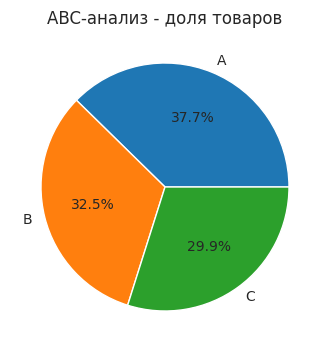

In [428]:
#ABC-анализ
sns.set_style('whitegrid')
plt.figure(figsize=(4,6))
plt.pie(abc_df.abc.value_counts(), labels = abc_df.abc.value_counts().index, autopct='%1.1f%%')
plt.title('ABC-анализ - доля товаров')
plt.show()

In [429]:
#добавление столбца abc в датасет
df = df.merge(abc_df[['abc', 'ProductID']], how = 'left', left_on = 'ProductID', right_on = 'ProductID')
df.shape

(2172, 30)

In [430]:
#xyz анализ (по клиентам)
#создание сводной таблицы с суммой продаж по клиентам по месяцам
xyz_df = df.groupby(['Year','Month', 'ProductID'])['OrderID'].agg('count').reset_index()
xyz_df = xyz_df.pivot_table(values = 'OrderID', index = 'ProductID', columns = ['Year', 'Month']).fillna(0).reset_index()
xyz_df.head(5)

Year  ProductID 2009                          2010            ... 2012       \
Month              7    8    9   10   11   12    1    2    3  ...    6    7   
0             1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 3.00   
1             2 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 1.00  ... 4.00 3.00   
2             3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 1.00 0.00   
3             4 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00  ... 0.00 0.00   
4             5 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00  ... 0.00 1.00   

Year                            2013            
Month     8    9   10   11   12    1    2    3  
0     10.00 2.00 1.00 2.00 0.00 1.00 0.00 1.00  
1      2.00 1.00 2.00 1.00 1.00 1.00 1.00 3.00  
2      0.00 0.00 1.00 0.00 0.00 0.00 0.00 2.00  
3      0.00 1.00 0.00 1.00 0.00 0.00 0.00 2.00  
4      0.00 1.00 1.00 1.00 0.00 0.00 1.00 1.00  

[5 rows x 46 columns]

In [431]:
std_demand = xyz_df.std(axis = 1)
std_demand

0     1.70
1     1.22
2     0.68
3     0.98
4     0.82
      ... 
72   10.73
73   10.88
74   11.00
75   11.15
76   11.29
Length: 77, dtype: float64

In [432]:
avg = xyz_df.mean(axis=1)
avg


0    0.85
1    1.02
2    0.37
3    0.52
4    0.33
     ... 
72   1.89
73   1.89
74   2.65
75   2.50
76   2.50
Length: 77, dtype: float64

In [433]:
xyz_df['std'] = std_demand
xyz_df['mean'] = avg
xyz_df['cov'] = xyz_df['std']/xyz_df['mean']
xyz_df.head(3)

Year  ProductID 2009                          2010            ... 2012       \
Month              7    8    9   10   11   12    1    2    3  ...    9   10   
0             1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 2.00 1.00   
1             2 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 1.00  ... 1.00 2.00   
2             3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 1.00   

Year            2013            std mean  cov  
Month   11   12    1    2    3                 
0     2.00 0.00 1.00 0.00 1.00 1.70 0.85 2.00  
1     1.00 1.00 1.00 1.00 3.00 1.22 1.02 1.19  
2     0.00 0.00 0.00 0.00 2.00 0.68 0.37 1.84  

[3 rows x 49 columns]

In [434]:
xyz_df['cov'].max()

6.0389128548496585

In [435]:
xyz_df['cov'].min()

1.1940448785002353

In [436]:
xyz_df['cov'].describe()

count   77.00
mean     3.80
std      1.17
min      1.19
25%      3.06
50%      3.94
75%      4.52
max      6.04
Name: cov, dtype: float64

In [437]:
# часто для распределения на группы используют величину ковариации в 10% и 25%, в целях данной задачи (редкая частота покупки) выберем другие значения
def xyz_group (cov):
  if cov <= 3:
        return 'X'
  elif cov > 3 and cov <= 4:
        return 'Y'
  else:
        return 'Z'

In [438]:
xyz_df['xyz'] = xyz_df['cov'].apply(xyz_group)
xyz_df.head(5)

Year  ProductID 2009                          2010            ... 2012       \
Month              7    8    9   10   11   12    1    2    3  ...   10   11   
0             1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 1.00 2.00   
1             2 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 1.00  ... 2.00 1.00   
2             3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 1.00 0.00   
3             4 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00  ... 0.00 1.00   
4             5 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00  ... 1.00 1.00   

Year       2013            std mean  cov xyz  
Month   12    1    2    3                     
0     0.00 1.00 0.00 1.00 1.70 0.85 2.00   X  
1     1.00 1.00 1.00 3.00 1.22 1.02 1.19   X  
2     0.00 0.00 0.00 2.00 0.68 0.37 1.84   X  
3     0.00 0.00 0.00 2.00 0.98 0.52 1.88   X  
4     0.00 0.00 1.00 1.00 0.82 0.33 2.51   X  

[5 rows x 50 columns]

In [439]:
xyz_df.columns = xyz_df.columns.droplevel('Month')


In [440]:
xyz_df.xyz.unique()

array(['X', 'Z', 'Y'], dtype=object)

In [441]:
xyz_df.columns.get_level_values(0)

Index(['ProductID',        2009,        2009,        2009,        2009,
              2009,        2009,        2010,        2010,        2010,
              2010,        2010,        2010,        2010,        2010,
              2010,        2010,        2010,        2010,        2011,
              2011,        2011,        2011,        2011,        2011,
              2011,        2011,        2011,        2011,        2011,
              2011,        2012,        2012,        2012,        2012,
              2012,        2012,        2012,        2012,        2012,
              2012,        2012,        2012,        2013,        2013,
              2013,       'std',      'mean',       'cov',       'xyz'],
      dtype='object', name='Year')

In [442]:
#добавление столбца abc в датасет
df = df.merge(xyz_df[['xyz', 'ProductID']], how = 'left', left_on = 'ProductID', right_on = 'ProductID')
df.shape

(2172, 31)

In [443]:
df.head(3)

,OrderID,OrderDate,Month,Year,CustomerID,EmployeeID,ShipperID,ProductID,Sales,Costs,...,EmployeeName,HireDate,Office,ReportsTo,Title,YearSalary,Churn,Discount_perc,abc,xyz
0,10248,2012-10-01,10,2012,4,2,2,11,343.44,284.37,...,Elvis Presley,1993-09-14,1,2.00,President,80000,No,0.00,A,X
1,10248,2012-10-01,10,2012,4,2,2,42,140.40,116.25,...,Elvis Presley,1993-09-14,1,2.00,President,80000,No,0.00,B,Y
2,10248,2012-10-01,10,2012,4,2,2,72,63.55,52.62,...,Elvis Presley,1993-09-14,1,2.00,President,80000,No,0.00,B,Z


In [444]:
df['Group_ABCXYZ'] = df[['abc', 'xyz']].agg(''.join, axis = 1)
df = df.drop(['abc', 'xyz'], axis =1)
df.head(5)

,OrderID,OrderDate,Month,Year,CustomerID,EmployeeID,ShipperID,ProductID,Sales,Costs,...,SupplierCountry,EmployeeName,HireDate,Office,ReportsTo,Title,YearSalary,Churn,Discount_perc,Group_ABCXYZ
0,10248,2012-10-01,10,2012,4,2,2,11,343.44,284.37,...,Spain,Elvis Presley,1993-09-14,1,2.00,President,80000,No,0.00,AX
1,10248,2012-10-01,10,2012,4,2,2,42,140.40,116.25,...,Singapore,Elvis Presley,1993-09-14,1,2.00,President,80000,No,0.00,BY
2,10248,2012-10-01,10,2012,4,2,2,72,63.55,52.62,...,Italy,Elvis Presley,1993-09-14,1,2.00,President,80000,No,0.00,BZ
3,10249,2011-10-01,10,2011,79,7,2,14,205.20,169.91,...,Japan,Tom Lindwall,1995-11-22,2,4.00,Sales Representative,61000,No,0.00,BX
4,10249,2011-10-01,10,2011,79,7,2,51,4048.00,3642.67,...,Australia,Tom Lindwall,1995-11-22,2,4.00,Sales Representative,61000,No,0.00,AY


In [445]:
#порядок столбцов
my_cols = ['OrderID', 'OrderDate', 'Month', 'Year', 'CustomerID', 'ProductID', 'Group_ABCXYZ',  'Product', 'CategoryID', 'Category', 'SupplierID', 'Supplier', 'SupplierContact', 'SupplierCountry','Sales', 'Costs', 'Profit', 'Quantity',  'Discount_perc',
       'Discount', 'Freight', 'CustomerID', 'Churn',  'EmployeeID','EmployeeName', 'Title', 'Office', 'ReportsTo',
       'YearSalary', 'HireDate']
df_full = df[my_cols]
df_full.shape

(2172, 30)

In [446]:
#список товаров, относящихся к группе AZ - товара, приносящие наибольщий доход, и наиболее часто встречающиеся в заказах
temp1 = df.loc[df['Group_ABCXYZ'] == 'AX']
temp1.groupby('ProductID').agg({'Product':'first', 'Category':'first'})

,Product,Category
ProductID,,
1,Lenin Jeansshorts,Men´s Clothes
2,Mr X Trousers,Men´s Clothes
7,Conserve Shoes,Children´s wear
11,Desperado Jeans,Men´s Clothes
13,Aino Shoes,Babywear
17,TieBreak Tennis shoes,Men´s Footwear


In [447]:
# анализ товаров - в скольких заказах встречаются TOP10
prod = df.groupby('Product').agg({'OrderID':'count', 'CustomerID':'nunique', 'Group_ABCXYZ':'first'}).rename(columns = {'OrderID':'Orders', 'CustomerID':'Customers'}).reset_index()
prod.sort_values(by = 'Orders', ascending=False).head(10)

,Product,Orders,Customers,Group_ABCXYZ
48,Rasta WCT,54,28,BY
55,Samba Socker Socks,52,30,CX
27,Game Over T-Shirt,51,34,BY
52,Rossi Bermuda Shorts,51,31,BX
28,High Heels Shoes,50,25,AY
59,Sheat Shoes,49,28,AY
9,Bow tie,47,30,BZ
20,Duck Shirt,47,27,BY
40,Mr X Trousers,45,31,AX
75,Wimbledon T-Shirt,43,29,BX


In [448]:
# у скольких клиентов TOP10
prod.sort_values(by = 'Customers', ascending=False).head(10)

,Product,Orders,Customers,Group_ABCXYZ
27,Game Over T-Shirt,51,34,BY
52,Rossi Bermuda Shorts,51,31,BX
40,Mr X Trousers,45,31,AX
55,Samba Socker Socks,52,30,CX
73,US-Master Jeans,39,30,AZ
9,Bow tie,47,30,BZ
54,Rossi Shorts,38,30,BZ
75,Wimbledon T-Shirt,43,29,BX
62,Snake Boots,40,29,AY
59,Sheat Shoes,49,28,AY


In [449]:
#выгрузка полного датасета в эксель
#df_full.to_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/FashionStore_full.xlsx', index = False)

In [450]:
#загрузка дф в BigQuery
#BqDatasetwithtable= 'case3.fashion_store_'
#BqProject='careful-griffin-327321'
#df_full.to_gbq(BqDatasetwithtable, BqProject)

# Анализ клиентской базы (отток, период обслуживания, частота покупок, средний чек)

In [451]:
df_churn = df.loc[df['Churn']=='Yes']
#df_churn
df_churn.CustomerID.nunique()

25

In [452]:
# доля ушедших клиентов
f"{df_churn.CustomerID.nunique()/df.CustomerID.nunique():.1%}"

'27.8%'

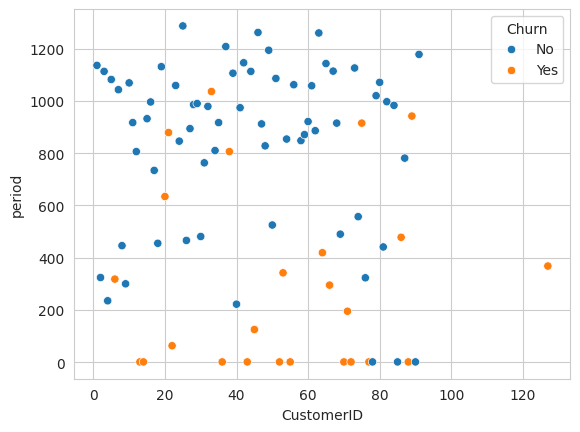

In [453]:
# период обслуживания (Lifetime)
clients_period = df.groupby('CustomerID').agg({'OrderDate':[min,max], 'Churn':'first'}).reset_index()
clients_period.columns=clients_period.columns.droplevel(0) #избавляемся от мультиндексов в шапке
clients_period['period']= (clients_period['max'] - clients_period['min']).dt.days+1 #период обслуживания в днях
clients_period.columns.values[0] = 'CustomerID' #переименование столбца по индексу
clients_period.columns.values[3] = 'Churn'

data = clients_period[['CustomerID', 'period', 'Churn']]
sns.scatterplot(x='CustomerID', y='period', data=data, hue='Churn')
plt.show()

In [454]:
clients_period['period'].loc[clients_period['Churn']=='Yes'].value_counts()

1       10
318      1
634      1
879      1
63       1
1036     1
806      1
125      1
342      1
419      1
295      1
195      1
915      1
478      1
942      1
368      1
Name: period, dtype: int64

In [455]:
#периоды обслуживания - бининг
clients_period['clients_period'] = np.where(clients_period['period'] == 1, 1, #1 день
                                            np.where((clients_period['period'] > 1) & (clients_period['period'] <=180), 2, #до полугода
                                                     np.where((clients_period['period'] >180) & (clients_period['period'] <=366), 3, #до года
                                                              np.where((clients_period['period'] >366) & (clients_period['period'] <=732), 4,5)))) #до 2х лет, более
#clients_period.sample(10)
clients_period['clients_period'].value_counts(normalize=True).sort_values(ascending=False)

5   0.60
1   0.14
4   0.13
3   0.10
2   0.02
Name: clients_period, dtype: float64

Значительная доля клиентов, которые ушли, совершали покупки в течение 1 дня (40%). Для дальнейшего анализа целесообразно разделить клиентов на группы с заданными интервалами.

In [456]:
#периодичность покупки
pp = df[['CustomerID', 'OrderID','OrderDate']].drop_duplicates().sort_values(by = ['CustomerID', 'OrderDate'])
pp['prev'] = pp.groupby('CustomerID')['OrderDate'].shift(1)
pp['delta']=(pp['OrderDate'] - pp['prev']).dt.days
pp = pp.groupby('CustomerID').agg({'delta':'mean'}).reset_index().fillna(0).round(0).rename(columns = {'delta':'Avg_freq'})
pp

,CustomerID,Avg_freq
0,1,33.00
1,2,108.00
2,3,185.00
3,4,78.00
4,5,64.00
...,...,...
85,88,0.00
86,89,72.00
87,90,0.00
88,91,196.00


In [457]:
pp.Avg_freq.describe()

count    90.00
mean    131.14
std     122.58
min       0.00
25%      44.50
50%      99.00
75%     182.75
max     571.00
Name: Avg_freq, dtype: float64

In [458]:
#бининг по частоте покупке (бины с равными интервалами)
labels = [1,2,3,4,5,6,7,8,9,10]
pp['freq_bins'] = pd.cut(pp['Avg_freq'], bins=10) #.astype(int)


In [459]:
pp.freq_bins.unique()

[(-0.571, 57.1], (57.1, 114.2], (171.3, 228.4], (285.5, 342.6], (114.2, 171.3], (456.8, 513.9], (228.4, 285.5], (513.9, 571.0], (399.7, 456.8], (342.6, 399.7]]
Categories (10, interval[float64, right]): [(-0.571, 57.1] < (57.1, 114.2] < (114.2, 171.3] <
                                            (171.3, 228.4] ... (342.6, 399.7] < (399.7, 456.8] <
                                            (456.8, 513.9] < (513.9, 571.0]]

In [460]:
pp.freq_bins.value_counts()

(-0.571, 57.1]    27
(57.1, 114.2]     22
(114.2, 171.3]    15
(171.3, 228.4]    13
(228.4, 285.5]     5
(285.5, 342.6]     2
(456.8, 513.9]     2
(513.9, 571.0]     2
(342.6, 399.7]     1
(399.7, 456.8]     1
Name: freq_bins, dtype: int64

In [461]:
#анализ по клиентам - сумма продаж, заказов, кол-во проодуктов, кол-во категорий, средняя скидка, средний чек-ТОП10
sales_to_cus = df.groupby(['CustomerID']).agg({'Sales':sum, 'OrderID':'nunique', 'ProductID':'nunique', 'CategoryID':'nunique', 'Discount_perc':'mean'}).reset_index()
sales_to_cus = sales_to_cus.rename(columns = {'Sales':'Sales_to_Cus', 'OrderID':'OrdersCount', 'ProductID':'ProductsCount', 'CategoryID':'Categs'})
sales_to_cus['AvgOrder'] = sales_to_cus['Sales_to_Cus']/sales_to_cus['OrdersCount']
sales_to_cus.sort_values(by = 'AvgOrder', ascending=False).head(10)

,CustomerID,Sales_to_Cus,OrdersCount,ProductsCount,Categs,Discount_perc,AvgOrder
69,71,14330.88,2,4,4,0.03,7165.44
61,63,201320.46,36,55,8,0.05,5592.23
60,62,49782.52,13,33,8,0.07,3829.42
18,19,152114.80,43,59,8,0.03,3537.55
22,23,91362.15,26,42,8,0.05,3513.93
25,26,10002.87,3,6,3,0.00,3334.29
7,8,9373.74,3,6,4,0.08,3124.58
40,41,21564.84,7,14,7,0.10,3080.69
78,80,68265.67,23,42,8,0.03,2968.07
36,37,131133.18,48,63,8,0.05,2731.94


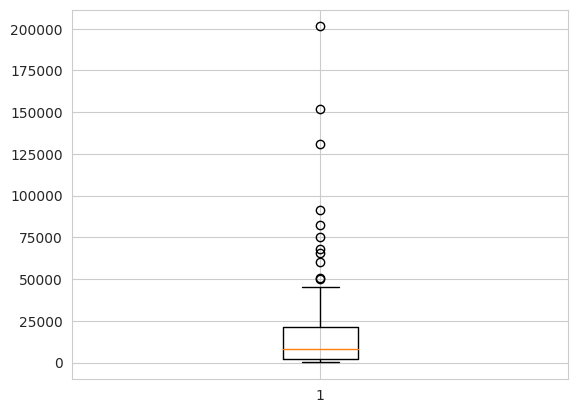

In [462]:
# распределение клиентов по выручке
plt.boxplot(sales_to_cus['Sales_to_Cus'])
plt.show()

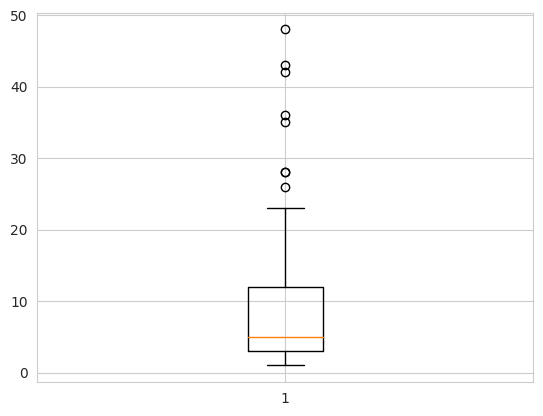

In [463]:
# распределение клиентов по количеству заказов
plt.boxplot(sales_to_cus['OrdersCount'])
plt.show()

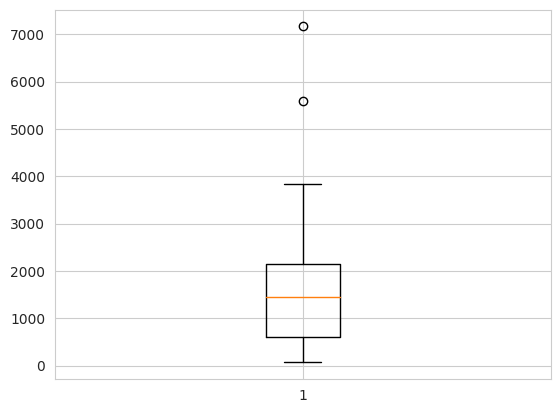

In [464]:
# распределение клиентов по среднему чеку
plt.boxplot(sales_to_cus['AvgOrder'])
plt.show()

In [465]:
#разделение всех клиентов на квинтили по всем атрибутам, имеющие непрерывные значения (допущение - равное количество бинов, количество бинов требует углубленной оценки для каждого параметра)
#qcut - интервалы с равным количеством значением
labels5 = [1,2,3,4,5]
sales_to_cus['Sales_bins'] = pd.qcut(sales_to_cus['Sales_to_Cus'], q=5, labels = labels5).astype(int)
sales_to_cus['Orders_bins'] = pd.qcut(sales_to_cus['OrdersCount'], q=5, labels = labels5).astype(int)
sales_to_cus['AvgOrder_bins'] = pd.qcut(sales_to_cus['AvgOrder'], q=5, labels = labels5).astype(int)
sales_to_cus['Prods_bins'] = pd.qcut(sales_to_cus['ProductsCount'], q=5, labels = labels5).astype(int)
#sales_to_cus['Discount_bins'] = pd.qcut(sales_to_cus['Discount_perc'], q=3, labels = labels5).astype(int)
sales_to_cus

,CustomerID,Sales_to_Cus,OrdersCount,ProductsCount,Categs,Discount_perc,AvgOrder,Sales_bins,Orders_bins,AvgOrder_bins,Prods_bins
0,1,75153.54,35,48,8,0.04,2147.24,5,5,4,5
1,2,1015.88,4,10,6,0.00,253.97,1,2,1,2
2,3,8984.93,7,15,7,0.05,1283.56,3,3,3,4
3,4,6688.34,4,8,5,0.03,1672.09,3,2,4,2
4,5,39838.91,18,37,8,0.04,2213.27,5,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...
85,88,66.00,1,1,1,0.00,66.00,1,1,1,1
86,89,22721.60,14,32,8,0.05,1622.97,4,4,4,5
87,90,442.77,1,3,1,0.00,442.77,1,1,1,1
88,91,3977.18,7,14,6,0.00,568.17,2,3,2,3


В данном разделе были прелприняты попытки анализа метрик по клиентам и их сегментация (бининг) в зависимости от значений данных метрик. Отмечаем, что отток клиентов составляет 27,8%, однако, для углубленного анализа следует уточнить понятие отток/приостановка обслуживания. Более половины клиентов совершают покупку чаще, чем 1 раз в 100 дней, 75% клиентов имеют периодичнсоть покупки больше, чем полгода. Однако эта доля также содержит клиентов, совершивших разовую покупку (14% всех покупателей). Основная часть покупателей (60%) сотрудничает с магазином более 2х лет.

Медианный средний чек составляет 1500 дол., 75% средних чеков находятся в диапазоне от 600 до 2100 дол.

In [466]:
#формирование дф для ML
df_ml = pp[['CustomerID','Avg_freq']].merge(sales_to_cus[['CustomerID','Categs','Sales_to_Cus','OrdersCount','AvgOrder', 'ProductsCount','Discount_perc']], on = 'CustomerID', how = 'left')
df_ml = df_ml.merge(clients_period[['CustomerID','period']], on = 'CustomerID', how = 'left')
df_ml = df_ml.merge(df[['CustomerID', 'Churn']], on = 'CustomerID', how = 'left').drop_duplicates()
df_ml

,CustomerID,Avg_freq,Categs,Sales_to_Cus,OrdersCount,AvgOrder,ProductsCount,Discount_perc,period,Churn
0,1,33.00,8,75153.54,35,2147.24,48,0.04,1136,No
82,2,108.00,6,1015.88,4,253.97,10,0.00,324,No
92,3,185.00,7,8984.93,7,1283.56,15,0.05,1113,No
109,4,78.00,5,6688.34,4,1672.09,8,0.03,235,No
117,5,64.00,8,39838.91,18,2213.27,37,0.04,1082,No
...,...,...,...,...,...,...,...,...,...,...
2104,88,0.00,1,66.00,1,66.00,1,0.00,1,Yes
2105,89,72.00,8,22721.60,14,1622.97,32,0.05,942,Yes
2145,90,0.00,1,442.77,1,442.77,3,0.00,1,No
2148,91,196.00,6,3977.18,7,568.17,14,0.00,1178,No


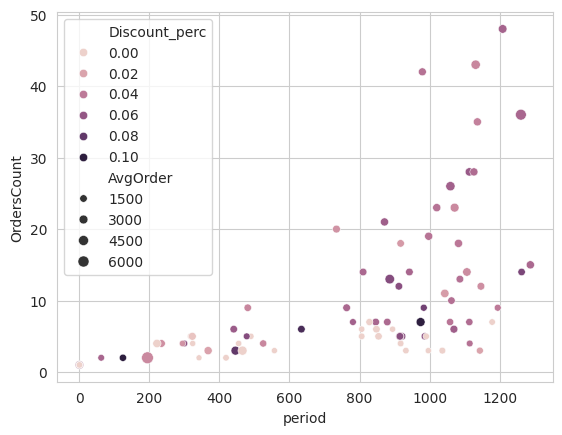

In [467]:
# исследование программы лояльности
discount = df_ml[['OrdersCount', 'Avg_freq', 'Discount_perc', 'period','Sales_to_Cus', 'AvgOrder']]
sns.scatterplot(x='period', y='OrdersCount', data = discount, hue='Discount_perc', size = 'AvgOrder')
plt.show()

#Прогноз оттока клиентов (ML)

In [468]:
df_ml.dtypes

CustomerID        object
Avg_freq         float64
Categs             int64
Sales_to_Cus     float64
OrdersCount        int64
AvgOrder         float64
ProductsCount      int64
Discount_perc    float64
period             int64
Churn             object
dtype: object

In [469]:
#отбор столбцов для дальнейшего анализа данных и ML, удаление столбцов, не вносящих нов.информации
df_ml = df_ml.drop(['CustomerID'], axis=1)
df_ml.head(1)

,Avg_freq,Categs,Sales_to_Cus,OrdersCount,AvgOrder,ProductsCount,Discount_perc,period,Churn
0,33.00,8,75153.54,35,2147.24,48,0.04,1136,No


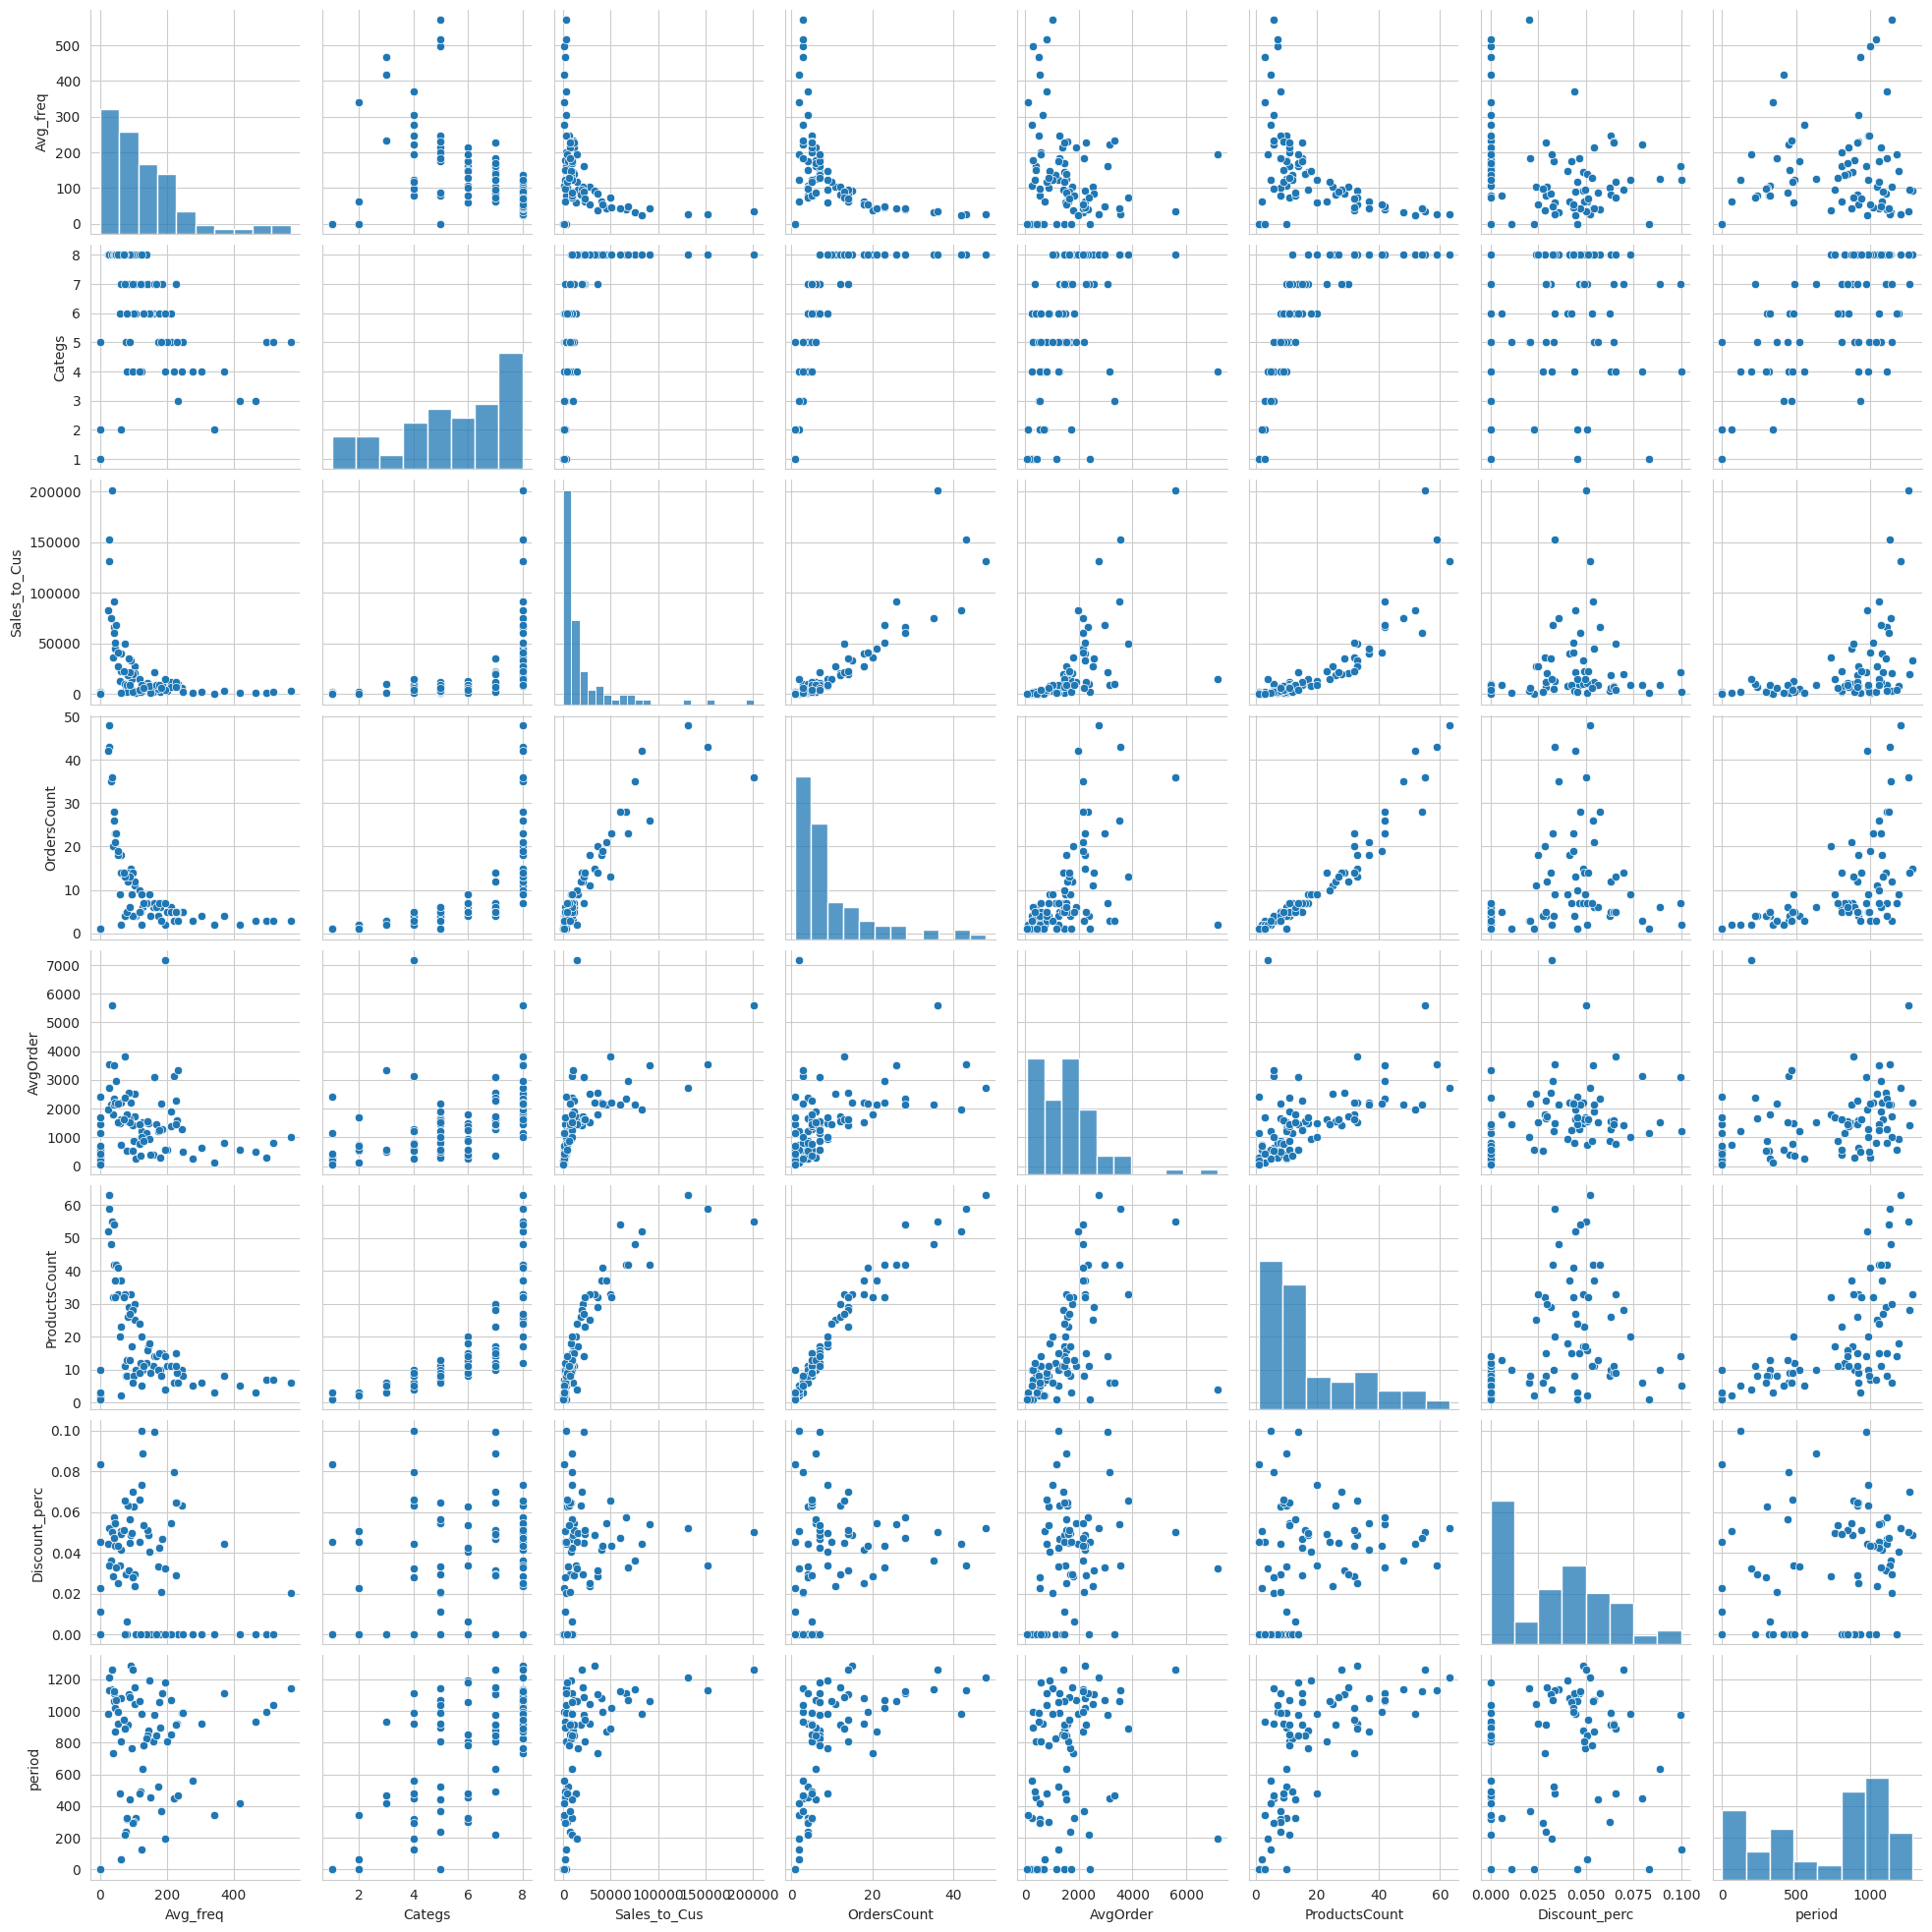

In [470]:
#анализ распределений
sns.pairplot(df_ml)

In [471]:
#!pip install -U dataprep

In [472]:
#from dataprep.eda import *

In [473]:
#plot(df_ml)

<ipython-input-474-626c367f2232>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ml.corr(),annot = True)


<Axes: >

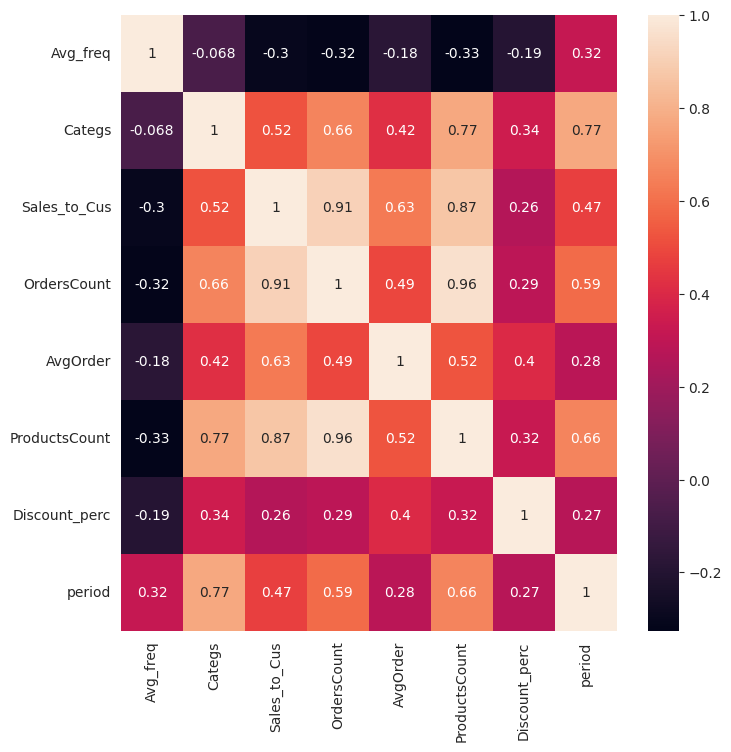

In [474]:
plt.figure(figsize = (8,8))
sns.heatmap(df_ml.corr(),annot = True)

Задачей машинного обучения будет прогнозирование оттока клиентов (задача бинарной классификации). В целях данной работы будут использованы модели - логистическая регрессия, случайный лес и градиентный бустинг. Для оценки качества модели используется метрика ROC AUC (устойчива к несбалансированным классам, в текущей задаче доля оттока 28%).

In [475]:
#удаление мультиколлинеарных признаков
df_ml = df_ml.drop('OrdersCount', axis=1)

In [476]:
columns_num = ['Avg_freq', 'Categs', 'Sales_to_Cus', 'AvgOrder',
       'ProductsCount', 'Discount_perc', 'period']

In [477]:
columns_cat = ['Churn']

In [478]:
#для категориальных столбцов - присвоение числовых значений
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
for feature in columns_cat:
    df_ml[feature] = le.fit_transform(df_ml[feature])

#для числовых - приведение к нормальному распределению
sc = StandardScaler()
for feature in columns_num:
    df_ml[feature] = sc.fit_transform(np.array(df_ml[feature]).reshape(-1,1))

df_ml.tail(5)

,Avg_freq,Categs,Sales_to_Cus,AvgOrder,ProductsCount,Discount_perc,period,Churn
2104,-1.08,-2.01,-0.59,-1.26,-1.06,-1.18,-1.69,1
2105,-0.49,1.08,0.09,0.09,0.99,0.69,0.60,1
2145,-1.08,-2.01,-0.58,-0.94,-0.92,-1.18,-1.69,0
2148,0.53,0.20,-0.47,-0.83,-0.20,-1.18,1.18,0
2164,0.43,-0.24,-0.40,0.57,-0.59,-0.42,-0.80,1


In [479]:
#сплит на обучающиеся и тестовые выборки
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X_train.shape

(63, 7)

In [480]:
X_test.shape

(27, 7)

Логистическая регрессия

In [481]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [482]:
predicted = lr.predict(X_test)
lr.score(X_test, y_test)

0.8888888888888888

In [483]:
from sklearn.metrics import roc_auc_score
probabilities = lr.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])

0.9454545454545454

In [484]:
weights = pd.Series(lr.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

Discount_perc    0.34
Avg_freq         0.34
ProductsCount    0.00
AvgOrder        -0.06
Sales_to_Cus    -0.41
Categs          -0.47
period          -1.01
dtype: float64

Случайный лес

In [485]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [486]:
predicted = rf.predict(X_test)
rf.score(X_test, y_test)

0.8888888888888888

In [487]:
probabilities = rf.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])

0.8636363636363636

Градиентный бустинг

In [488]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=3, random_state=0).fit(X_test, y_test)
gb.score(X_test, y_test)

1.0

In [489]:
probabilities = gb.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])

1.0

# Визуальная аналитика Tableu

In [490]:
%%html
<div class='tableauPlaceholder' id='viz1635425506584' style='position: relative'><noscript><a href='#'><img alt='Story 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_fin&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FashionStore_fin&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_fin&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1635425506584');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [491]:
%%html
<div class='tableauPlaceholder' id='viz1635432389653' style='position: relative'><noscript><a href='#'><img alt='Story 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_supp_&#47;Story2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FashionStore_supp_&#47;Story2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_supp_&#47;Story2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1635432389653');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

** В Story 3 для чарта Group_ABCXYZ использована другая методика расчета, внести правки невозможно из-за отсутствия доступа в Tableu

In [492]:
%%html
<div class='tableauPlaceholder' id='viz1635432542528' style='position: relative'><noscript><a href='#'><img alt='Story 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_custom_&#47;Story3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FashionStore_custom_&#47;Story3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_custom_&#47;Story3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1635432542528');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [493]:
#PowerBI - студенческая учетная запись, нет доступа
%%html
<iframe width="1140" height="541.25" src="https://app.powerbi.com/reportEmbed?reportId=734ddb82-92b1-4b45-81cf-65082ba0db15&autoAuth=true&ctid=c8c69aae-32ba-43d1-9f59-f98c95fb227b&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLXdlc3QtZXVyb3BlLXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9" frameborder="0" allowFullScreen="true"></iframe>